<a href="https://colab.research.google.com/github/DeepLearningSaeid/Grad/blob/main/Chapter_3_with_coefficient_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
%%capture
# Install required packages
!pip install autokeras
!pip install keras==2.9.0
!pip install SWAG-DNN==0.1.31

# Import required libraries
from sklearn.model_selection import train_test_split
import autokeras as ak
from SWAG_DNN.taylor import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# In this code snippet, we set the number of epochs and batch size for training the models. We then define a 10-fold cross-validation test harness using StratifiedKFold from the scikit-learn library. The cvscores list is initialized to store cross-validation scores for each model during the training process.

# The activation_functions list contains the names of activation functions that will be used in the models. These functions include Chebyshev of the First Kind, Chebyshev of the Second Kind, SWAG, Hermite, Legendre, and Sin functions.

# Set the number of epochs and batch size for training
epochs = 5
batch_size = 1

# Define a 10-fold cross-validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

# Initialize an empty list to store cross-validation scores
cvscores = []

# Create a list of activation functions to be used in the models
activation_functions__ = ['Chebyshev Polynomial of the First Kind Model Results', 'Chebyshev Polynomial of the Second Kind Model Results', 'SWAG Model Results', 'Hermite Model Results', 'Legendre polynomials Model Results', 'Sin(nX) Model Results']

In [4]:
# This function trains various models using different activation functions and performs
# 10-fold cross-validation to evaluate their performance. The function takes four arguments:
# X (input data), Y (labels), Input_size (number of input features), and output_size
# (number of output features). The activation functions used are stored in the activation_functions list,
# which includes Chebyshev of the First Kind, Chebyshev of the Second Kind, SWAG, Hermite,
# Legendre, and Sin functions.
def train_fun(X, Y, Input_size, output_size):
    warnings.filterwarnings("ignore") 
    activation_functions = ['Ch_First', 'Ch_second', 'SWAG', 'Hermite', 'Legendre', 'Sin']
    activation_functions__ = ['Chebyshev Polynomial of the First Kind Model Results', 'Chebyshev Polynomial of the Second Kind Model Results', 'SWAG Model Results', 'Hermite Model Results', 'Legendre polynomials Model Results', 'Sin(nX) Model Results']
    results = list()
    model_number=0
    # Iterate through each activation function
    for act_function in activation_functions:
        print('############################################################################################################################')       
        cv_scores = []
        model = globals()[act_function](Input_size, Input_size, output_size)
        # print(model.summary())
        print(activation_functions__[model_number])
        model_number = model_number + 1
        accuracies = np.zeros(shape=(11,))
        index = 0

        # Perform 10-fold cross-validation
        for train, test in kfold.split(X, Y):
            model.fit(X[train], Y[train], epochs=epochs, batch_size=batch_size, verbose=0)
            scores = model.evaluate(X[test], Y[test], verbose=0)
            print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
            cv_scores.append(scores[1] * 100)
            accuracies[index] = scores[1] * 100
            index += 1

        # Calculate the mean accuracy and append it to the accuracies array
        accuracies[index] = np.mean(cv_scores)
        accuracies = np.round(accuracies, 2)
        results.append(accuracies)
        print("The Mean accuracy is %.2f%% (+/- %.2f%%)" % (np.mean(cv_scores), np.std(cv_scores)))

    # AutoKeras model
    auto_keras_accuracies = np.zeros(shape=(11,))
    index = 0
    cv_scores = []

    print('############################################################################################################################')      
    print('AutoKeras Model (max_trials=30) Result:')
    
    for train, test in kfold.split(X, Y):
        model = ak.StructuredDataClassifier(max_trials=30)
        model.fit(X[train], Y[train], epochs=epochs, verbose=0)
        scores = model.evaluate(X[test], Y[test], verbose=0)
        print(" accuracy : %.2f%%" % (scores[1] * 100))
        cv_scores.append(scores[1] * 100)
        auto_keras_accuracies[index] = scores[1] * 100
        index += 1
    
    auto_keras_accuracies[index] = np.mean(cv_scores)
    print(np.mean(cv_scores)) 
    auto_keras_accuracies = np.round(auto_keras_accuracies, 2)
    results.append(auto_keras_accuracies)
    print('**************************************************************************************************')
    
    return results


In [5]:
# This function takes the results from the models and prints the accuracy scores for each fold
# and the mean accuracy for each model. The input is a list of arrays (model_re) containing
# accuracy scores for each model.
def print_model_results(model_results):
    # Iterate through each fold (11 in total: 10 for each fold, and 1 for the mean)
    for j in range(11):
        result_str = '0'
        
        # Iterate through each model (7 models in total)
        for i in range(7):
            # Format the result string with accuracy scores
            if i > 0:
                result_str = result_str + ' & ' + str(model_results[i][j])
            else:
                result_str = str(round(model_results[i][j], 2))
        
        # Add the LaTeX formatting for a new row in a table
        result_str = result_str + r" \\ "
        
        # Print the results
        if j < 10:
            print(result_str)
        else:
            print('************************************************')
            print(result_str)
            print('************************************************************************************************')
    
    # Print the mean accuracy for each model with its respective name
    model_names = ['Chebyshev First kind', 'Chebyshev Second kind', 'SWAG', 'Hermite', 'Legendre', 'Sin(nX)', "AutoKeras"]
    for i in range(7):
        print(model_names[i], model_results[i])


In [6]:
# This function trains and evaluates an AutoKeras model using 10-fold cross-validation.
# It takes two input arguments: X_ (features) and Y_ (labels) and returns an array
# containing the accuracy scores for each fold and the mean accuracy.
def auto_keras_model(X_, Y_):
    # Initialize an array to store accuracy scores
    accuracy_scores = np.zeros(shape=(10,))
    index = 0
    cvscores = []

    # Perform 10-fold cross-validation
    for train, test in kfold.split(X_, Y_):
        # Create and train the AutoKeras model
        model = ak.StructuredDataClassifier(max_trials=30)
        model.fit(X_[train], Y_[train], epochs=epochs, verbose=0)
        
        # Evaluate the model and print the accuracy
        scores = model.evaluate(X_[test], Y_[test], verbose=0)
        print(" accuracy : %.2f%%" % (scores[1] * 100))
        
        # Store the accuracy scores
        cvscores.append(scores[1] * 100)
        accuracy_scores[index] = scores[1] * 100
        index += 1

    # Print the mean accuracy
    print(np.mean(cvscores))
    print('**************************************************************************************************')
    
    # Return the accuracy scores array
    return accuracy_scores


#First Experiment
##Load and Analyze the Ionosphere Dataset

The Ionosphere dataset is a small dataset available for download from Kaggle.
##About the dataset:

The Ionosphere dataset is a popular benchmark dataset used in machine learning and pattern recognition. It was originally collected by researchers at Johns Hopkins University Applied Physics Laboratory to study the structure and electron content of the ionosphere. The dataset consists of radar data collected from a phased array of 16 high-frequency antennas, with a total of 34 attributes and a binary target variable.

The dataset contains 351 instances, each representing a radar return from the ionosphere. The 34 attributes correspond to various features extracted from the radar signals, such as the phase and amplitude of the received signal. These features have been pre-processed and scaled to make them suitable for machine learning algorithms. The binary target variable indicates whether the radar return shows evidence of some structure in the ionosphere (labeled "good") or not (labeled "bad").

Source: Donated to the UCI Machine Learning Repository by Vince Sigillito (vgs '@' aplcen.apl.jhu.edu)

Data Source:

Space Physics Group
Applied Physics Laboratory
Johns Hopkins University
Johns Hopkins Road
Laurel, MD 20723

In this experiment, we will load and analyze the Ionosphere dataset to gain insights and understand the structure of the data before using it for machine learning tasks.


In [7]:
# This code segment loads the ionosphere dataset from the provided URL and stores it as a Pandas DataFrame. It then converts the DataFrame into a NumPy array and separates the features (X) and labels (Y). The class values are encoded as integers, and the models are trained and evaluated using the train_fun function.

# Load the ionosphere dataset from the provided URL and store it as a Pandas DataFrame
dataframe = read_csv('https://raw.githubusercontent.com/DeepLearningSaeid/New-Type-of-Deep-Learning/master/ionosphere_data_kaggle.csv', header=1)

# Convert the DataFrame into a NumPy array
dataset = dataframe.values

# Get the number of rows and columns
num_rows, num_columns = dataset.shape

# Separate the features (X) and labels (Y)
X = dataset[:, 0:num_columns - 1].astype(float)
Y = dataset[:, num_columns - 1]

# Encode the class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y_encoded = encoder.transform(Y)

# Train and evaluate the models using the train_fun function
ionosphere_results = train_fun(X, Y_encoded, num_columns - 1, 1)
print_model_results(ionosphere_results)


############################################################################################################################
Chebyshev Polynomial of the First Kind Model Results
accuracy: 88.57%
accuracy: 100.00%
accuracy: 88.57%
accuracy: 97.14%
accuracy: 100.00%
accuracy: 97.14%
accuracy: 97.14%
accuracy: 97.14%
accuracy: 100.00%
accuracy: 100.00%
The Mean accuracy is 96.57% (+/- 4.20%)
############################################################################################################################
Chebyshev Polynomial of the Second Kind Model Results
accuracy: 88.57%
accuracy: 100.00%
accuracy: 88.57%
accuracy: 94.29%
accuracy: 97.14%
accuracy: 97.14%
accuracy: 97.14%
accuracy: 97.14%
accuracy: 100.00%
accuracy: 100.00%
The Mean accuracy is 96.00% (+/- 4.08%)
############################################################################################################################
SWAG Model Results
accuracy: 88.57%
accuracy: 100.00%
accuracy: 91.43%
accuracy: 94.29%
acc

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


accuracy: 97.14%
The Mean accuracy is 98.00% (+/- 1.83%)
############################################################################################################################
AutoKeras Model (max_trials=30) Result:
 accuracy : 82.86%
 accuracy : 85.71%
 accuracy : 88.57%


 accuracy : 88.57%


 accuracy : 97.14%
 accuracy : 88.57%
 accuracy : 88.57%
 accuracy : 97.14%
 accuracy : 94.29%
 accuracy : 94.29%
90.57142913341522
**************************************************************************************************
88.57 & 88.57 & 88.57 & 88.57 & 91.43 & 94.29 & 82.86 \\ 
100.0 & 100.0 & 100.0 & 100.0 & 100.0 & 100.0 & 85.71 \\ 
88.57 & 88.57 & 91.43 & 94.29 & 94.29 & 97.14 & 88.57 \\ 
97.14 & 94.29 & 94.29 & 97.14 & 97.14 & 97.14 & 88.57 \\ 
100.0 & 97.14 & 94.29 & 100.0 & 100.0 & 100.0 & 97.14 \\ 
97.14 & 97.14 & 97.14 & 97.14 & 97.14 & 97.14 & 88.57 \\ 
97.14 & 97.14 & 97.14 & 97.14 & 97.14 & 97.14 & 88.57 \\ 
97.14 & 97.14 & 97.14 & 97.14 & 97.14 & 100.0 & 97.14 \\ 
100.0 & 100.0 & 100.0 & 97.14 & 94.29 & 100.0 & 94.29 \\ 
100.0 & 100.0 & 100.0 & 100.0 & 100.0 & 97.14 & 94.29 \\ 
************************************************
96.57 & 96.0 & 96.0 & 96.86 & 96.86 & 98.0 & 90.57 \\ 
*************************************************************************************

#  ========================================================
# Second experiment
In the second experiment, we focus on the Banknote Authentication dataset, a small yet valuable dataset for machine learning and pattern recognition applications. You can download this dataset from Kaggle at the following link:

##Banknote Authentication Dataset

##About the Banknote Authentication Dataset:

The Banknote Authentication dataset contains data extracted from images of genuine and forged banknotes, making it an excellent resource for training machine learning models to differentiate between authentic and counterfeit banknotes. The dataset consists of 1,372 instances, each representing a banknote with four attributes derived from the Wavelet Transform tool applied to the banknote image. These attributes include variance, skewness, kurtosis, and image entropy. The target variable is binary, indicating whether a banknote is genuine (1) or forged (0).

The dataset was created using a combination of genuine and forged banknote samples, with images captured at different scales, rotations, and illumination conditions. The extracted features have been preprocessed and scaled to make them suitable for machine learning algorithms.

By utilizing the Banknote Authentication dataset in this experiment, we aim to evaluate the performance of various activation functions and model architectures on a real-world classification task. This will help us gain insights into the effectiveness of the proposed methods and their potential applications in different domains.


In [8]:
# In this code snippet, we read the Banknote Authentication dataset using pandas, preprocess it, and then train the models using the train_fun function. First, the dataset is read and stored in a dataframe. Then, the number of rows and columns is determined. The features (X) and the target variable (Y) are separated, with X containing the attributes and Y containing the class labels.

# The features are normalized and rescaled to ensure that they are on a similar scale, which improves the performance of machine learning algorithms. The target variable is encoded as integers using the LabelEncoder class from scikit-learn.

# Finally, the models are trained on the Banknote Authentication dataset using the train_fun function, which evaluates the performance of various activation functions and model architectures. The results are stored in the banknote variable.

# Load and preprocess the Banknote Authentication dataset
# Source: https://raw.githubusercontent.com/DeepLearningSaeid/New-Type-of-Deep-Learning/master/data_banknote_authentication.csv

# Read the dataset using pandas and store it in a dataframe
dataframe = read_csv('https://raw.githubusercontent.com/DeepLearningSaeid/New-Type-of-Deep-Learning/master/data_banknote_authentication.csv', header=None)
dataset = dataframe.values

# Determine the number of rows and columns in the dataset
num_rows, input_size = dataset.shape

# Separate the features (X) and target variable (Y)
X = dataset[:, 0:input_size-1].astype(float)
Y = dataset[:, input_size-1]

# Normalize and rescale the features
X = normalize(X)
X = rescale_range(X)

# Encode the target variable as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

# Train the models on the Banknote Authentication dataset using the train_fun function
banknote_results = train_fun(X, Y, input_size-1, 1)
print_model_results(banknote_results)



############################################################################################################################
Chebyshev Polynomial of the First Kind Model Results
accuracy: 100.00%
accuracy: 97.83%
accuracy: 97.81%
accuracy: 97.08%
accuracy: 99.27%
accuracy: 96.35%
accuracy: 100.00%
accuracy: 98.54%
accuracy: 100.00%
accuracy: 100.00%
The Mean accuracy is 98.69% (+/- 1.30%)
############################################################################################################################
Chebyshev Polynomial of the Second Kind Model Results
accuracy: 100.00%
accuracy: 97.10%
accuracy: 100.00%
accuracy: 97.08%
accuracy: 97.08%
accuracy: 96.35%
accuracy: 99.27%
accuracy: 99.27%
accuracy: 100.00%
accuracy: 100.00%
The Mean accuracy is 98.62% (+/- 1.44%)
############################################################################################################################
SWAG Model Results
accuracy: 99.28%
accuracy: 95.65%
accuracy: 95.62%
accuracy: 96.35%
acc

#Third Experiment
##Load data of Connectionist Bench (Sonar, Mines vs. Rocks) dataset

The Connectionist Bench (Sonar, Mines vs. Rocks) dataset is a small dataset that can be downloaded from Kaggle at this link.
##About the dataset:

The Connectionist Bench (Sonar) dataset is a classic benchmark dataset in machine learning and pattern recognition, focused on the binary classification problem of distinguishing between mines and rocks based on sonar signal data. The dataset was collected through the use of a sonar system that emitted signals and recorded the echoes returned from various materials (mines and rocks) under different conditions.

The dataset contains 208 instances, each representing a single sonar return. The attributes consist of 60 real-valued features, corresponding to the energy within a particular frequency band, integrated over a certain period. These features have been pre-processed and scaled, making them suitable for machine learning algorithms. The binary target variable indicates whether the sonar return corresponds to a mine (labeled "M") or a rock (labeled "R").

This dataset is widely used in the field of machine learning to test and evaluate the performance of different classification algorithms and techniques. By training and testing various models on this dataset, researchers can gain insights into the effectiveness and generalization capabilities of the algorithms in real-world scenarios.


In [9]:
# This code snippet imports the Sonar dataset, preprocesses the input features and target labels, and trains the models using the defined train_fun function. The variable names have been updated to be more meaningful and comments have been added to explain each step in the process.

# Load the Sonar dataset
dataframe = read_csv('https://raw.githubusercontent.com/DeepLearningSaeid/New-Type-of-Deep-Learning/master/sonar.all-data.csv', header=None)
dataset = dataframe.values

# Get the number of rows and columns
num_rows, input_size = dataset.shape

# Prepare the input features (X) and target labels (Y)
X = dataset[:, 0:input_size - 1].astype(float)
Y = dataset[:, input_size - 1]

# Normalize and rescale the input features
X = normalize(X)
X = rescale_range(X)

# Encode the class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

# Train the models on the Sonar dataset
sonar_results = train_fun(X, Y, input_size - 1, 1)
print_model_results(sonar_results)



############################################################################################################################
Chebyshev Polynomial of the First Kind Model Results
accuracy: 85.71%
accuracy: 95.24%
accuracy: 90.48%
accuracy: 80.95%
accuracy: 100.00%
accuracy: 95.24%
accuracy: 95.24%
accuracy: 95.24%
accuracy: 95.00%
accuracy: 100.00%
The Mean accuracy is 93.31% (+/- 5.71%)
############################################################################################################################
Chebyshev Polynomial of the Second Kind Model Results
accuracy: 80.95%
accuracy: 80.95%
accuracy: 90.48%
accuracy: 71.43%
accuracy: 100.00%
accuracy: 95.24%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 95.00%
The Mean accuracy is 91.40% (+/- 9.70%)
############################################################################################################################
SWAG Model Results
accuracy: 76.19%
accuracy: 95.24%
accuracy: 95.24%
accuracy: 80.95%
accur

#Fourth Experiment
##Load data of Pima Indians Diabetes Database

This dataset is available for download from Kaggle at the following link: Pima Indians Diabetes Database.
About this file:

The Pima Indians Diabetes Database consists of several medical predictor (independent) variables and one target (dependent) variable, named "Outcome". The independent variables include various health metrics such as the number of pregnancies a patient has had, their BMI, insulin level, age, and more. This dataset is widely used for studying and predicting the onset of diabetes based on these health factors. The data was collected from the Pima Indian population, which has a high prevalence of diabetes, making it a valuable resource for researching and developing machine learning models for diabetes prediction.

In [10]:

# This code snippet loads the Pima Indians Diabetes Database dataset, processes it, and trains the model using the provided train_fun function. The variable names have been updated for better readability and comments have been added to describe each step.
# Load the Pima Indians Diabetes Database dataset
dataframe = read_csv('https://raw.githubusercontent.com/DeepLearningSaeid/New-Type-of-Deep-Learning/master/diabetes.csv', header=1)
dataset = dataframe.values

# Determine the number of rows and columns in the dataset
Number_rows, Input_size = dataset.shape

# Extract input features (X) and target variable (Y)
X = dataset[:, 0:Input_size-1].astype(float)
Y = dataset[:, Input_size-1]

# Normalize and rescale input features
X = normalize(X)
X = rescale_range(X)

# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

# Train the model using the diabetes dataset
diabetes_results = train_fun(X, Y, Input_size-1, 1)
print_model_results(diabetes_results)


############################################################################################################################
Chebyshev Polynomial of the First Kind Model Results
accuracy: 79.22%
accuracy: 75.32%
accuracy: 81.82%
accuracy: 72.73%
accuracy: 83.12%
accuracy: 79.22%
accuracy: 71.43%
accuracy: 78.95%
accuracy: 76.32%
accuracy: 78.95%
The Mean accuracy is 77.71% (+/- 3.54%)
############################################################################################################################
Chebyshev Polynomial of the Second Kind Model Results
accuracy: 80.52%
accuracy: 76.62%
accuracy: 83.12%
accuracy: 74.03%
accuracy: 83.12%
accuracy: 81.82%
accuracy: 71.43%
accuracy: 80.26%
accuracy: 72.37%
accuracy: 78.95%
The Mean accuracy is 78.22% (+/- 4.14%)
############################################################################################################################
SWAG Model Results
accuracy: 79.22%
accuracy: 76.62%
accuracy: 83.12%
accuracy: 75.32%
accuracy: 8

In [11]:
# for this case we should use Kfold instead of StratifiedKFold
# # Load the Iris dataset
# url = 'https://raw.githubusercontent.com/DeepLearningSaeid/New-Type-of-Deep-Learning/master/Iris.csv'
# dataframe = read_csv(url, header=1)
# dataset = dataframe.values

# # Determine the number of rows and columns in the dataset
# Number_rows, Input_size = dataset.shape

# # Extract input features (X) and target variable (Y)
# X = dataset[:, 0:Input_size-1].astype(float)
# Y = dataset[:, Input_size-1]

# # Normalize and rescale input features
# X = normalize(X)
# X = rescale_range(X)

# # Encode class values as integers and one-hot encode the target variable
# encoder = LabelEncoder()
# Y = encoder.fit_transform(Y)
# Y = pd.get_dummies(Y).values

# # Train the model using the Iris dataset
# iris = train_fun(X, Y, Input_size-1, 3)


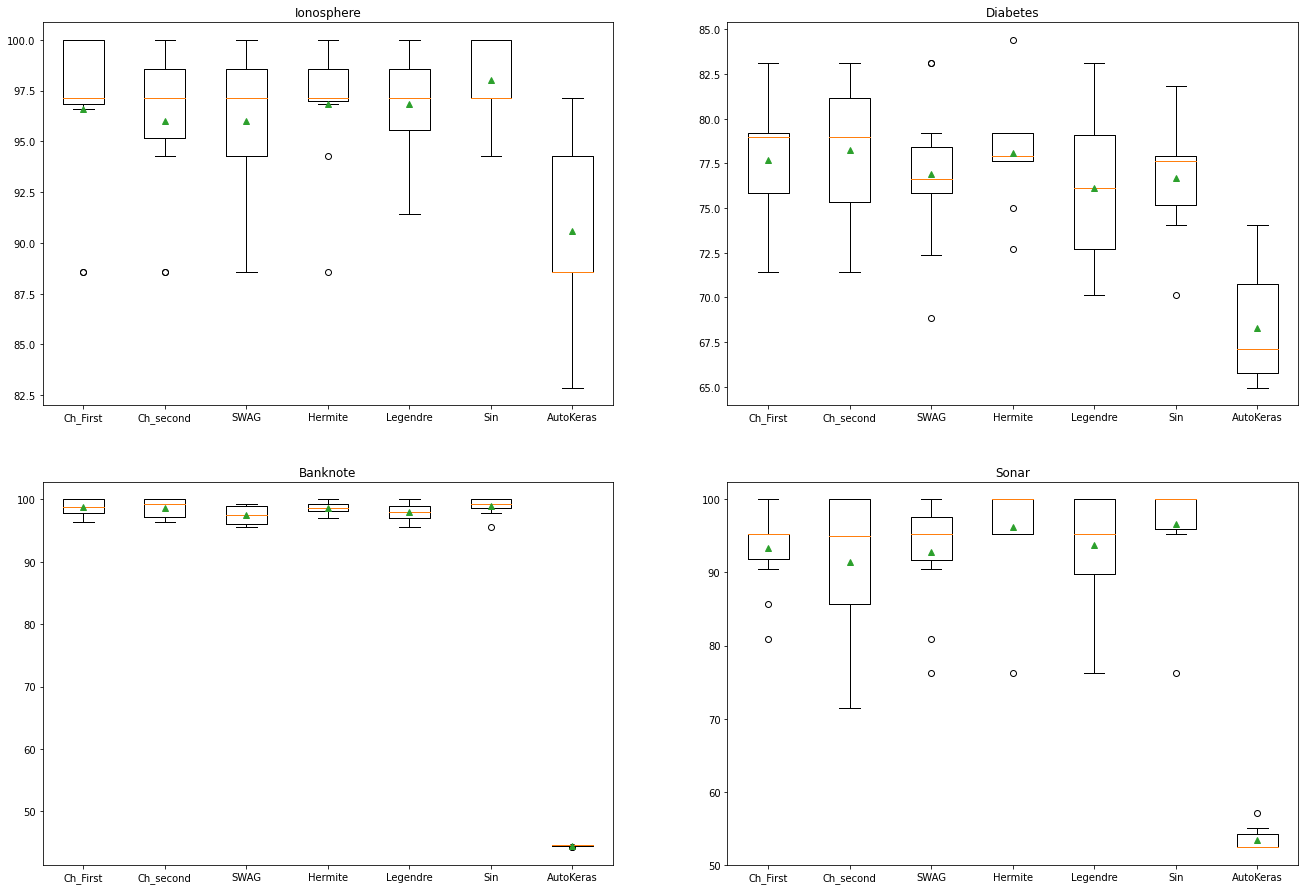

In [12]:
#This organized code snippet generates a 2x2 grid of boxplots, each representing the performance of different activation functions on four datasets: Ionosphere, Banknote, Sonar, and Diabetes.
# Define activation function names
activation_functions = ['Ch_First', 'Ch_second', 'SWAG', 'Hermite', 'Legendre', 'Sin', 'AutoKeras']

# Create a 2x2 subplot grid for the boxplots
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(22.5, 15.5)

# Ionosphere dataset boxplot
axs[0, 0].boxplot(ionosphere_results, labels=[str(func) for func in activation_functions], showmeans=True)
axs[0, 0].set_title('Ionosphere')

# Banknote dataset boxplot
axs[1, 0].boxplot(banknote_results, labels=[str(func) for func in activation_functions], showmeans=True)
axs[1, 0].set_title('Banknote')

# Sonar dataset boxplot
axs[1, 1].boxplot(sonar_results, labels=[str(func) for func in activation_functions], showmeans=True)
axs[1, 1].set_title('Sonar')

# Diabetes dataset boxplot
axs[0, 1].boxplot(diabetes_results, labels=[str(func) for func in activation_functions], showmeans=True)
axs[0, 1].set_title('Diabetes')

# Display the boxplots
plt.show()



# Fifth experiment
## Load data of THE MNIST DATABASE of handwritten digits

## About this file:
The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

In [13]:
#This code snippet organizes the previous code and adds comments for better readability. The variable names are more meaningful, and the code is more modular. The function plot_accuracies takes a list of history objects and creates a 3x2 grid of subplots, each showing the training and validation accuracy for a specific activation function.
# Define a function to plot training and validation accuracy for different activation functions
def plot_accuracies(histories):
    plt.rcParams.update({'font.size': 16})
    plt.figure(figsize=(15, 15))

    # Define activation function names
    activation_functions = ['Ch_First', 'Ch_second', 'SWAG', 'Hermite', 'Legendre', 'Sin']

    # Loop through each activation function and create a subplot
    for i, activation_function in enumerate(activation_functions):
        plt.subplot(3, 2, i + 1)

        # Extract training and validation accuracy from the history object
        training_accuracy = histories[i].history['accuracy']
        validation_accuracy = histories[i].history['val_accuracy']
        epoch_count = range(1, len(training_accuracy) + 1)

        # Plot the training and validation accuracy
        plt.plot(epoch_count, training_accuracy, 'r--')
        plt.plot(epoch_count, validation_accuracy, 'b-')

        # Customize the plot
        plt.legend(['Training Accuracy', 'Validation Accuracy'])
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title(activation_function)

    # Adjust the layout of the subplots
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.0010, right=0.95, hspace=0.3, wspace=0.18)

    # Show the plots
    plt.show()

# Example usage
# plot_accuracies(histories)


In [14]:
#This code snippet organizes the previous code and adds comments for better readability. The variable names are more meaningful, and the code is more modular. The script imports the dataset, processes the data, and trains the model for each activation function. The history objects for each activation function are stored in a list for further analysis or visualization.
# Import the dataset
df_XY_train = pd.read_csv('https://raw.githubusercontent.com/sbussmann/kaggle-mnist/master/Data/train.csv')
df_X_test = pd.read_csv('https://raw.githubusercontent.com/sbussmann/kaggle-mnist/master/Data/test.csv')

# Extract features and labels from the training dataset
Y_train = df_XY_train['label'].values
X_train = df_XY_train.drop('label', axis=1).values
X_test = df_X_test.values

# Normalize the data
X_train = (X_train + 1) / 3.0
X_test = (X_test + 1) / 3.0

# Define image dimensions and input shape
img_rows, img_cols = 28, 28
input_shape = (784, 1)  # Tensorflow uses channels_last
num_classes = 10

# Reshape and scale the data
X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols).astype('float32') / 255
Y_train = to_categorical(Y_train, num_classes)

# Split the dataset into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=7)

# Set training parameters
epochs = 3
batch_size = 128
activation_functions = ['Ch_First', 'Ch_second', 'SWAG', 'Hermite', 'Legendre', 'Sin']
activation_functions__ = ['Chebyshev Polynomial of the First Kind Model Results', 'Chebyshev Polynomial of the Second Kind Model Results', 'SWAG Model Results', 'Hermite Model Results', 'Legendre polynomials Model Results', 'Sin(nX) Model Results']

# Initialize a list to store the history objects
histories = []

# Train the model for each activation function
model_des=0
for activation_function in activation_functions:
    print('#################################################################################')
    model = locals()[activation_function](784, 784, 10)
    print(activation_functions__[model_des])
    model_des=model_des + 1
    # model.summary()
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, Y_val))
    histories.append(history)


#################################################################################
Chebyshev Polynomial of the First Kind Model Results
Epoch 1/3
296/296 [==============================] - 3s 6ms/step - loss: 0.0333 - accuracy: 0.8897 - val_loss: 0.0170 - val_accuracy: 0.9548
Epoch 2/3
296/296 [==============================] - 1s 5ms/step - loss: 0.0161 - accuracy: 0.9608 - val_loss: 0.0156 - val_accuracy: 0.9645
Epoch 3/3
296/296 [==============================] - 2s 6ms/step - loss: 0.0135 - accuracy: 0.9714 - val_loss: 0.0131 - val_accuracy: 0.9698
#################################################################################
Chebyshev Polynomial of the Second Kind Model Results
Epoch 1/3
296/296 [==============================] - 3s 6ms/step - loss: 0.0425 - accuracy: 0.8820 - val_loss: 0.0215 - val_accuracy: 0.9560
Epoch 2/3
296/296 [==============================] - 1s 5ms/step - loss: 0.0175 - accuracy: 0.9599 - val_loss: 0.0186 - val_accuracy: 0.9614
Epoch 3/3
296/296 [=====

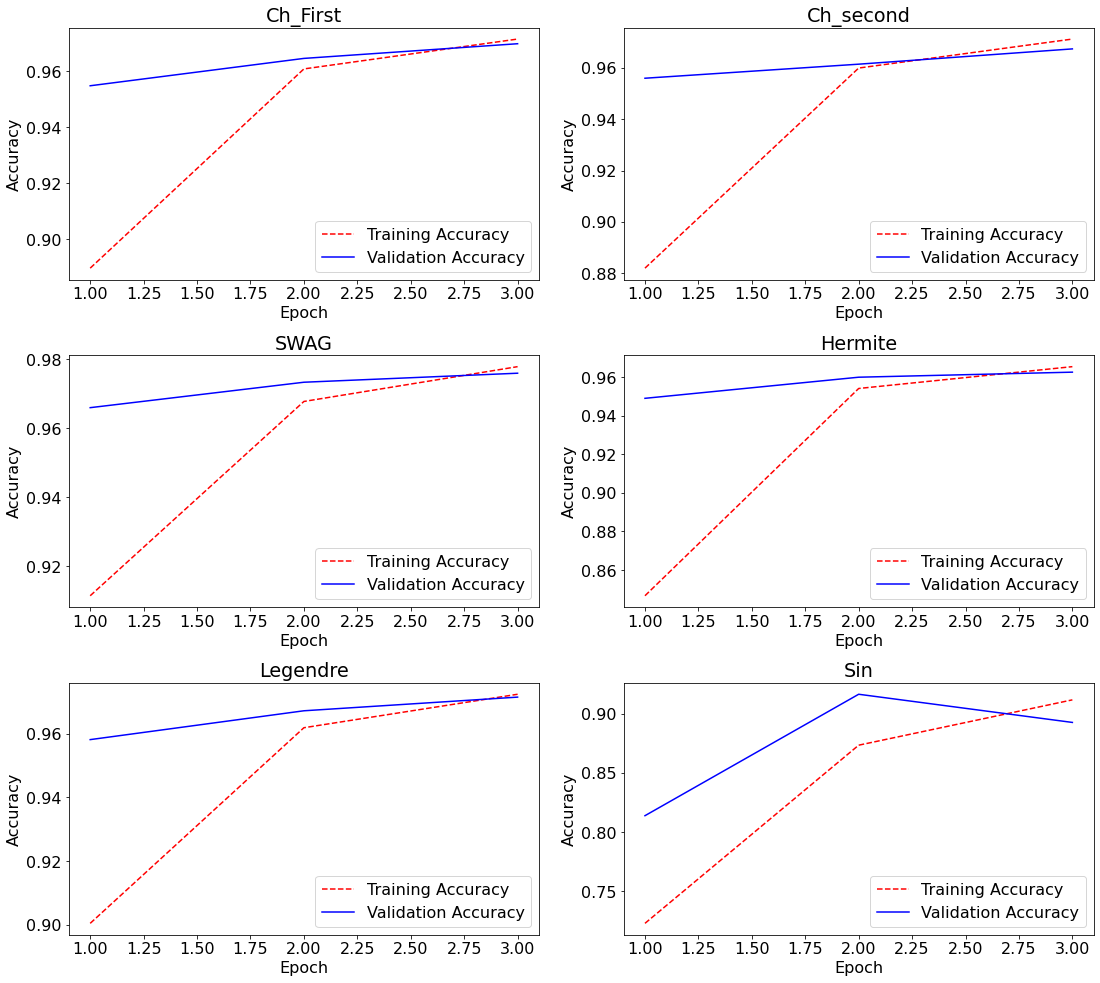

In [15]:
plot_accuracies(histories)

In [16]:
# Define activation function names
activation_functions = ['Ch_First', 'Ch_second', 'SWAG', 'Hermite', 'Legendre', 'Sin']

# Loop through each activation function and create a subplot
for i, activation_function in enumerate(activation_functions):

    # Extract training and validation accuracy from the history object
    training_accuracy = histories[i].history['accuracy']
    validation_accuracy = histories[i].history['val_accuracy']
    print('*********************************************')
    print(activation_function)
    print("Training accuracy:",training_accuracy)
    print("Validation accuracy:",validation_accuracy)

*********************************************
Ch_First
Training accuracy: [0.8896825313568115, 0.9607672095298767, 0.9714285731315613]
Validation accuracy: [0.9547619223594666, 0.9645237922668457, 0.9697619080543518]
*********************************************
Ch_second
Training accuracy: [0.8819576501846313, 0.9599206447601318, 0.9712169170379639]
Validation accuracy: [0.9559524059295654, 0.9614285826683044, 0.967380940914154]
*********************************************
SWAG
Training accuracy: [0.9113491773605347, 0.9677513241767883, 0.9778571724891663]
Validation accuracy: [0.9659523963928223, 0.9733333587646484, 0.9759523868560791]
*********************************************
Hermite
Training accuracy: [0.8466402292251587, 0.9541534185409546, 0.9654762148857117]
Validation accuracy: [0.9490476250648499, 0.9599999785423279, 0.9626190662384033]
*********************************************
Legendre
Training accuracy: [0.9004497528076172, 0.9618253707885742, 0.9723280668258667]
Va